In [92]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('registro.csv')


### Gráfico que muestre el porcentaje de partidas por estado (fin, cancelada, error,  timeout). También debe tener en cuenta las partidas que se terminaron  inesperadamente o de forma repentina (partidas sin evento de fin).

Inconclusas  2
Estado
cancelada      2
finalizada    12
timeout        1
dtype: int64
15
cancelada     11.764706
finalizada    70.588235
timeout        5.882353
inconclusa    11.764706
dtype: float64


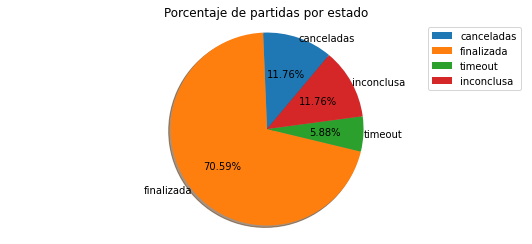

In [108]:
data_por_id = df.groupby(['ID'])

total_partidas = df[df['Evento'] == 'inicio_partida'].count()[0]

partidas_finalizadas = df[df['Evento'] == 'fin']

total_finalizadas = partidas_finalizadas.count()[0]

partidas_inconclusas = total_partidas - total_finalizadas
print('Inconclusas ', partidas_inconclusas)
porcentaje_inconclusa = pd.Series([partidas_inconclusas / total_partidas * 100], index=['inconclusa'])

print(partidas_finalizadas.groupby(['Estado']).size())
print(len(partidas_finalizadas))

porcentaje = (partidas_finalizadas.groupby(['Estado']).size() / total_partidas) * 100
porcentaje = pd.concat([porcentaje, porcentaje_inconclusa], axis=0)
print(porcentaje)

etiquetas = ['canceladas', 'finalizada', 'timeout', 'inconclusa']
plt.pie(porcentaje, labels=etiquetas, autopct='%1.2f%%', shadow=True, startangle=50, labeldistance=1.0)
plt.axis('equal')
plt.legend()
plt.title("Porcentaje de partidas por estado")
plt.show()


### Gráfico que muestre el porcentaje de partidas finalizadas según género.

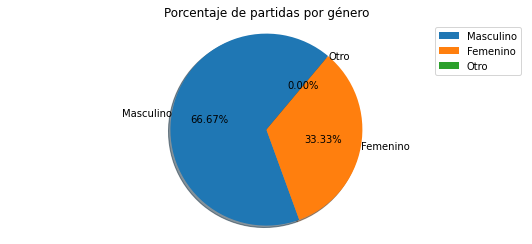

In [107]:
from roots import ROOT_PERFILES
import json

valores = df[df['Evento'] == 'fin']['Usuario'].value_counts()

llaves = valores.keys()

with open(ROOT_PERFILES, 'r') as reg:
    dicc = json.load(reg)

mas = 0
fem = 0
otro = 0

x = []
y = []

suma = valores.sum()


def buscarNick(nick, perfiles):
    i = 0
    while i < len(perfiles):
        if perfiles[i]["nick"] == nick:
            break
        i += 1
    return perfiles[i]["genero"]


for i in range(len(llaves)):
    genero = buscarNick(llaves[i], dicc)
    if (genero == "Masculino"):
        mas += valores[i]
        if ('Masculino' not in x):
            x.append('Masculino')
    elif (genero == "Femenino"):
        fem += valores[i]
        if ('Femenino' not in x):
            x.append('Femenino')
    else:
        otro += valores[i]
        if ('Otro'not in x):
            x.append('Otro')

if (mas != 0):
    y.append((mas*100) / suma)
else:
    y.append(0)
if (fem != 0):
    y.append((fem*100) / suma)
else:
    y.append(0)
if (otro != 0):
    y.append((otro*100) / suma)
else:
    y.append(0)

etiquetas = ['Masculino', 'Femenino', 'Otro']
plt.pie(y, labels=etiquetas, autopct='%1.2f%%', shadow=True, startangle=50, labeldistance=1.0)
plt.axis('equal')
plt.legend()
plt.title("Porcentaje de partidas por género")
plt.show()


### Gráfico que muestre el porcentaje de partidas finalizadas según nivel.

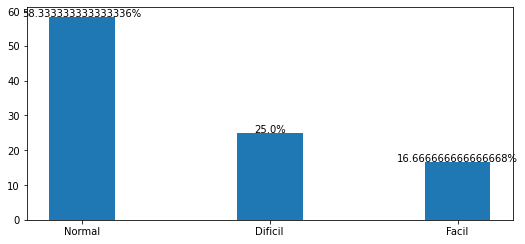

In [106]:
valores = df[df['Estado'] == 'finalizada']['Nivel'].value_counts()

llave = valores.keys()

suma = valores.sum()

data = []

for i in range(len(llave)):
    data.append((valores[i]*100)/suma)

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x = llave
y = data

width = 0.35
fig, ax = plt.subplots()

pps = ax.bar(x, y, width, align='center')

for p in pps:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
            s="{}%".format(height),
            ha='center')

plt.show()
